In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

# Basecase

In [3]:
basecase = pd.read_csv("../experiments/Citizen_Model_Experiments BaseCase -table.csv", skiprows= 22)

# Drop the first column only containing nan values
basecase = basecase.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
basecase["tick"] = list(basecase.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = basecase.loc[basecase["random-seed"] == 1 ,  "tick"]
basecase["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
basecase

# generate one single dataset for means having tick as the key column
basecase_seed1 = basecase.loc[(basecase["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
basecase_seed2 = basecase.loc[(basecase["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
basecase_seed3 = basecase.loc[(basecase["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
basecase_seed4 = basecase.loc[(basecase["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

basecase_means = pd.merge(basecase_seed1, basecase_seed2, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed3, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed4, on= "tick")
basecase_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

## Max Values

In [8]:
max_values = pd.read_csv("Max_values-table.csv", skiprows= 23)

# Drop the first column only containing nan values
max_values = max_values.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
max_values["tick"] = list(max_values.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = max_values.loc[max_values["random-seed"] == 1 ,  "tick"]
max_values["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
max_values

# generate one single dataset for means having tick as the key column
max_values_seed1 = max_values.loc[(basecase["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
max_values_seed2 = max_values.loc[(basecase["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
max_values_seed3 = max_values.loc[(basecase["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
max_values_seed4 = max_values.loc[(basecase["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

max_values_means = pd.merge(max_values_seed1, max_values_seed2, on= "tick")
max_values_means = pd.merge(max_values_means, max_values_seed3, on= "tick")
max_values_means = pd.merge(max_values_means, max_values_seed4, on= "tick")
max_values_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

## Plotting

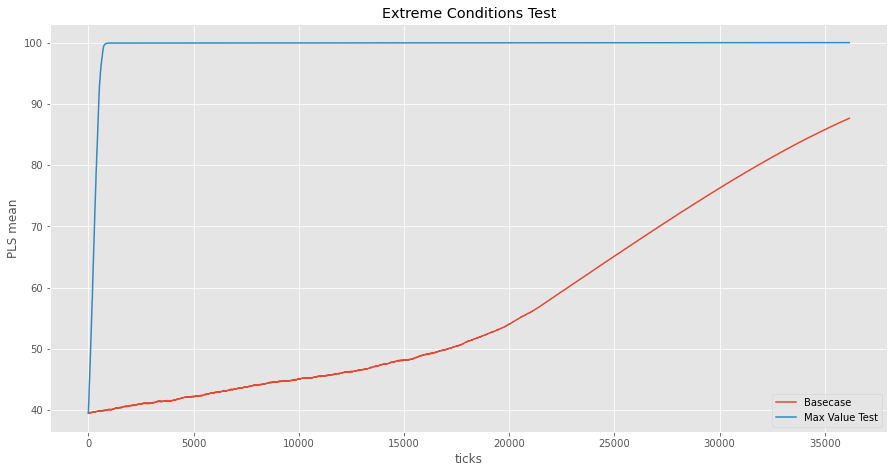

In [10]:
basecase_aggregated = pd.concat([basecase_means.iloc[:, 0], basecase_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
basecase_aggregated.columns = ["tick", "PLS mean - basecase"]

max_values_aggregated = pd.concat([max_values_means.iloc[:, 0], max_values_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
max_values_aggregated.columns = ["tick", "PLS mean - Max Values"]

plt.figure(figsize=(15,7.5))

plt.plot(basecase_aggregated["tick"], basecase_aggregated["PLS mean - basecase"], label="Basecase" );
plt.plot(max_values_aggregated["tick"], max_values_aggregated["PLS mean - Max Values"], label="Max Value Test" );


plt.legend();
plt.title("Extreme Conditions Test");
plt.xlabel("ticks");
plt.ylabel("PLS mean");